## 2. Some Simple Time Series

In [44]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [54]:
np.random.seed(42)

<b>Taxing Exercise: Compute the ACF</b>

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting alpha=1.

In [55]:
HRB = pd.read_csv('./input/HRB.csv', index_col=0)

In [56]:
HRB.head(10)

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34
2008Q2,-0.42
2008Q3,0.02
2008Q4,2.11
2009Q1,-0.39


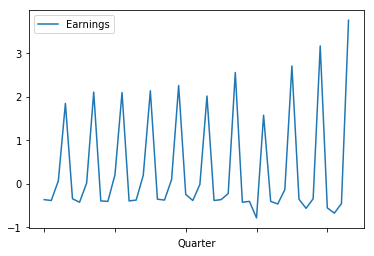

In [57]:
HRB.plot()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


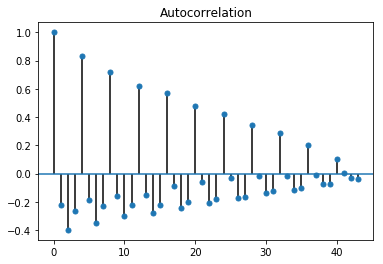

In [58]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20, ...

<b>Are We Confident This Stock is Mean Reverting?</b>

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/N−−√ where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/N−−√. This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is pre-loaded in a DataFrame called returns.

In [59]:
MSFT = pd.read_csv('input/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index)
MSFT = MSFT.resample(rule='W', how='last')
returns = MSFT.pct_change()
returns = returns.iloc[1:,:]

The autocorrelation of weekly MSFT returns is -0.16
nobs :  260
The approximate confidence interval is +/- 0.12


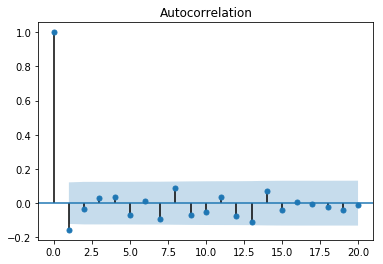

In [60]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns.index)
print("nobs : ", nobs)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

<b>Can't Forecast White Noise</b>

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modelled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

<b>Can't Forecast White Noise</b>

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modelled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

The mean is 0.021 and the standard deviation is 0.049


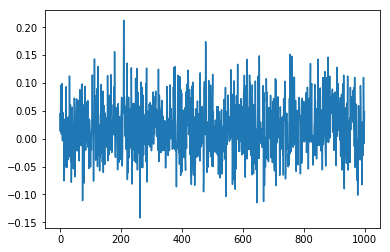

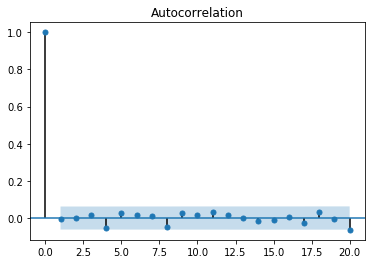

In [61]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

<b>Generate a Random Walk</b>

Whereas stock returns are often modelled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

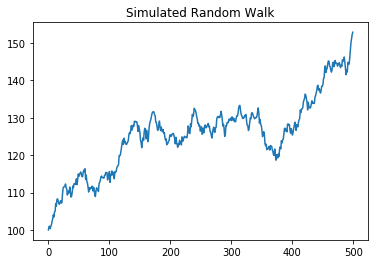

In [62]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

The simulated price series you plotted should closely resemble a random walk.

<b>Get the Drift</b>

In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

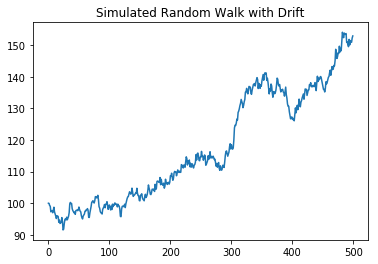

In [64]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

<b>Are Stock Prices a Random Walk?</b>

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [65]:
AMZN = pd.read_csv('./input/AMZN.csv', index_col=0)

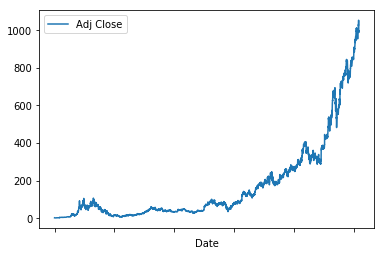

In [67]:
AMZN.plot()

In [66]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770741, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

In [69]:
results = adfuller(MSFT['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(0.5276344885718529, 0.9856892582563026, 1, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 832.0857227547677)
The p-value of the test on prices is: 0.9856892582563026


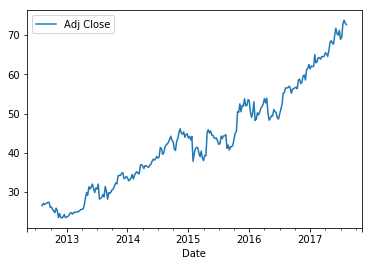

In [70]:
MSFT.plot()

<b>How About Stock Returns?</b>

In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [72]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.iloc[1:,:]

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083483613e-22


<b>Seasonal Adjustment During Tax Season</b>

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,..., because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


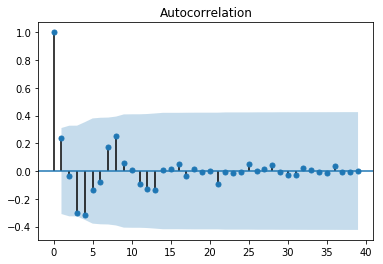

In [74]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(periods=4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()